In [26]:
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [2]:
df = pd.read_csv("outputs/constituencieswithresultsprocessed.csv")
df = df.dropna(axis=1)

In [3]:
drop_cols = ["ONS code", "New constituency name","Total population", "2019_Results", "2017_Results", "2015_Results", "2010_Results", "2005_Results","Cluster", "Low_Confidence_Imputation","EngReg","Scot",'2019_Resultstot','2017_Resultstot','2015_Resultstot','2010_Resultstot',  '2005_Resultslab', '2005_Resultslib', '2005_Resultsref',
       '2005_Resultsnat', '2005_Resultsoth', '2005_Resultstot',
       '2005_Resultscon_pc', '2005_Resultslab_pc', '2005_Resultslib_pc',
       '2005_Resultsref_pc', '2005_Resultsnat_pc', '2005_Resultsoth_pc','2017_Resultscon',
       '2017_Resultslab', '2017_Resultslib', '2017_Resultsref',
       '2017_Resultsnat', '2017_Resultsoth', '2017_Resultstot',
       '2017_Resultscon_pc', '2017_Resultslab_pc', '2017_Resultslib_pc',
       '2017_Resultsref_pc', '2017_Resultsnat_pc', '2017_Resultsoth_pc',
       '2015_Resultscon', '2015_Resultslab', '2015_Resultslib',
       '2015_Resultsref', '2015_Resultsnat', '2015_Resultsoth',
       '2015_Resultstot', '2015_Resultscon_pc', '2015_Resultslab_pc',
       '2015_Resultslib_pc', '2015_Resultsref_pc', '2015_Resultsnat_pc',
       '2015_Resultsoth_pc', '2010_Resultscon', '2010_Resultslab',
       '2010_Resultslib', '2010_Resultsref', '2010_Resultsnat',
       '2010_Resultsoth', '2010_Resultstot', '2010_Resultscon_pc',
       '2010_Resultslab_pc', '2010_Resultslib_pc', '2010_Resultsref_pc',
       '2010_Resultsnat_pc', '2010_Resultsoth_pc', '2005_Resultscon','2019_Resultscon', '2019_Resultslab',
       '2019_Resultslib', '2019_Resultsref', '2019_Resultsnat',
       '2019_Resultsoth']
unnamed_cols = [col for col in df.columns if "Unnamed:" in col]
for col in unnamed_cols:
    drop_cols.append(col)
print(drop_cols)
xdf = df.drop(drop_cols,axis=1)
xdf = xdf.dropna(axis=1).copy()
# xdf.fillna(xdf.mean(), inplace=True)
# X = xdf.values
# X.shape

['ONS code', 'New constituency name', 'Total population', '2019_Results', '2017_Results', '2015_Results', '2010_Results', '2005_Results', 'Cluster', 'Low_Confidence_Imputation', 'EngReg', 'Scot', '2019_Resultstot', '2017_Resultstot', '2015_Resultstot', '2010_Resultstot', '2005_Resultslab', '2005_Resultslib', '2005_Resultsref', '2005_Resultsnat', '2005_Resultsoth', '2005_Resultstot', '2005_Resultscon_pc', '2005_Resultslab_pc', '2005_Resultslib_pc', '2005_Resultsref_pc', '2005_Resultsnat_pc', '2005_Resultsoth_pc', '2017_Resultscon', '2017_Resultslab', '2017_Resultslib', '2017_Resultsref', '2017_Resultsnat', '2017_Resultsoth', '2017_Resultstot', '2017_Resultscon_pc', '2017_Resultslab_pc', '2017_Resultslib_pc', '2017_Resultsref_pc', '2017_Resultsnat_pc', '2017_Resultsoth_pc', '2015_Resultscon', '2015_Resultslab', '2015_Resultslib', '2015_Resultsref', '2015_Resultsnat', '2015_Resultsoth', '2015_Resultstot', '2015_Resultscon_pc', '2015_Resultslab_pc', '2015_Resultslib_pc', '2015_Resultsref_p

In [4]:
ohe = OneHotEncoder(sparse_output=False)
regdf = pd.DataFrame(ohe.fit_transform(pd.DataFrame(xdf.loc[:,"Region"])))
regdf.shape

(632, 11)

In [5]:
X_df = xdf.join(regdf)
X_df = xdf.copy()
X_df = X_df.drop("Region",axis=1)

In [6]:
X = X_df.values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [7]:
km = KMeans(n_clusters=10, random_state=2024) #326
km.fit(X)

ms = MeanShift()
ms.fit(X)

MeanShift()

In [9]:
#Hierarchical
Z = linkage(X, method="average", metric="euclidean")


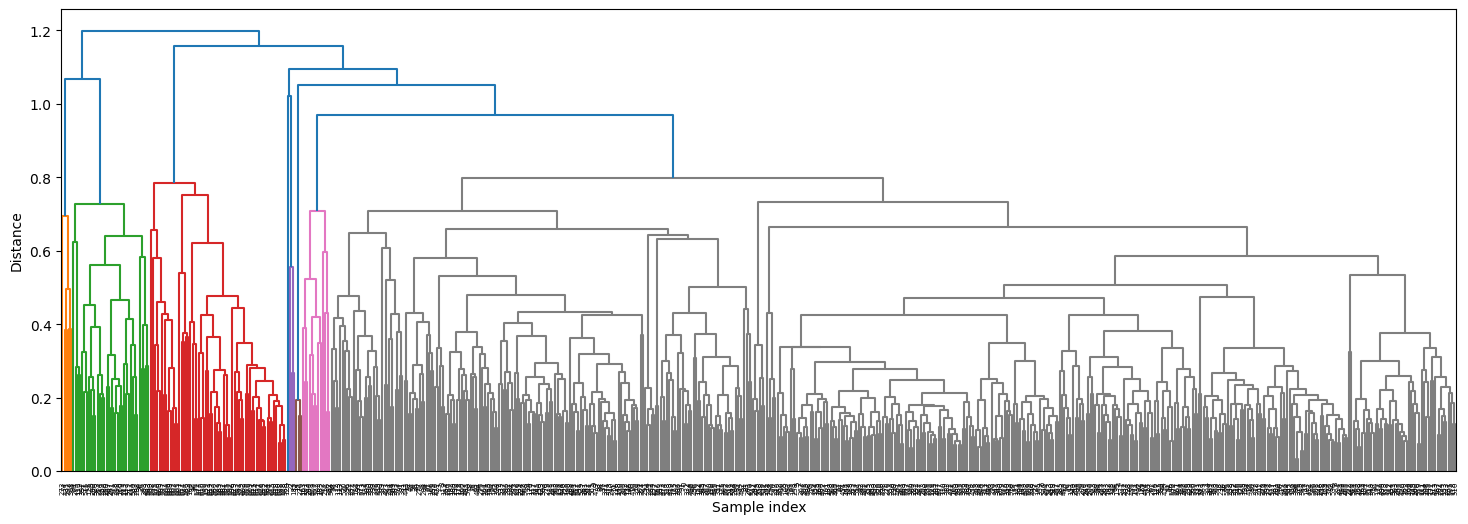

In [10]:
plt.figure(figsize=(18,6))
dendrogram(Z)
plt.ylabel('Distance')
plt.xlabel('Sample index')
plt.show()

In [11]:
Z_ward = linkage(X, method='ward', metric='euclidean')

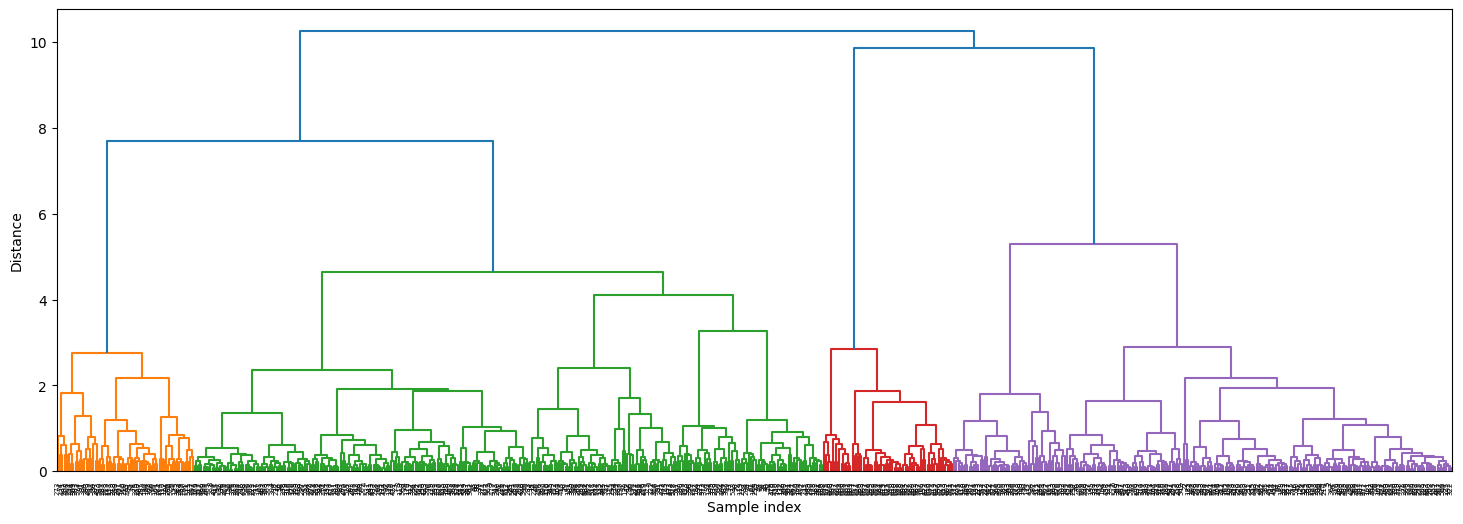

In [13]:
# Draw the Ward dendrogram

plt.figure(figsize=(18,6))
dendrogram(Z_ward)
plt.ylabel('Distance')
plt.xlabel('Sample index')
plt.show()


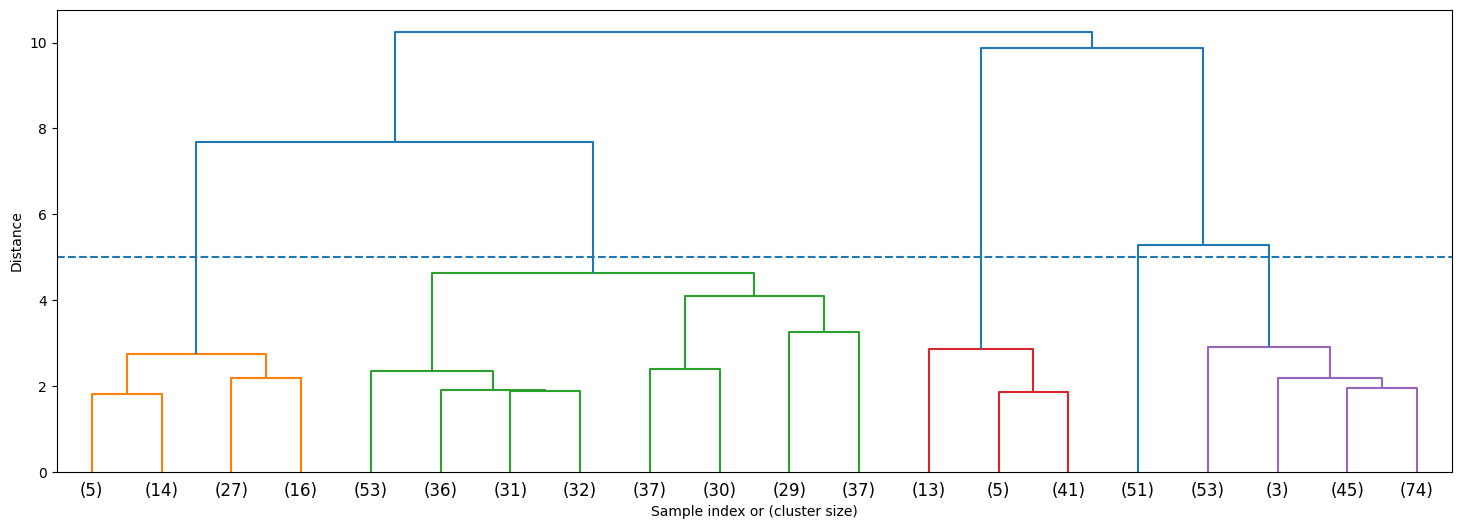

In [18]:
# Draw the truncated dendogram
plt.figure(figsize=(18,6))

dendrogram(Z_ward, color_threshold=5, truncate_mode='lastp', p=20)

plt.ylabel('Distance')
plt.xlabel('Sample index or (cluster size)')
plt.hlines(5, 0, len(X), linestyle='--') #If you want to see where you've started coloring.
plt.show()

In [31]:
n_cluster = 10
agglomerative = AgglomerativeClustering(
                    n_clusters=n_cluster, linkage='ward')

In [32]:
cluster_assignment_ward = agglomerative.fit_predict(X)


In [33]:
X_df

,Aged 15 years and under,Aged 16 to 24 years,Aged 25 to 34 years,Aged 35 to 49 years,Aged 50 to 64 years,Aged 65 years and over,Ref16_Results,2019_Resultscon_pc,2019_Resultslab_pc,2019_Resultslib_pc,2019_Resultsref_pc,2019_Resultsnat_pc,2019_Resultsoth_pc
0,0.186065,0.095598,0.124386,0.179638,0.208793,0.205520,0.582142,0.264676,0.513365,0.039966,0.087213,0.080382,0.014397
1,0.185379,0.099821,0.158247,0.207732,0.187737,0.161083,0.572829,0.606381,0.234568,0.157415,0.000000,0.000000,0.001636
2,0.177914,0.089929,0.114617,0.177711,0.212078,0.227750,0.667464,0.679195,0.248601,0.058205,0.005551,0.000000,0.008449
3,0.212833,0.082260,0.100719,0.219046,0.194859,0.190282,0.385878,0.494596,0.379194,0.113465,0.000000,0.000000,0.012745
4,0.181960,0.089956,0.130467,0.191326,0.208382,0.197909,0.574214,0.422958,0.422882,0.059589,0.060273,0.034298,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,0.164256,0.092739,0.113755,0.181623,0.218503,0.229124,0.397439,0.374507,0.061346,0.064245,0.007328,0.489998,0.002575
628,0.177859,0.091283,0.121138,0.200151,0.214436,0.195134,0.373329,0.176275,0.322716,0.052705,0.000000,0.438432,0.009873
629,0.160007,0.119000,0.125081,0.174560,0.216834,0.204518,0.329703,0.345627,0.083010,0.055469,0.000000,0.515298,0.000597
630,0.188758,0.085324,0.095580,0.206090,0.223372,0.200875,0.391688,0.426507,0.045571,0.117218,0.000000,0.410704,0.000000


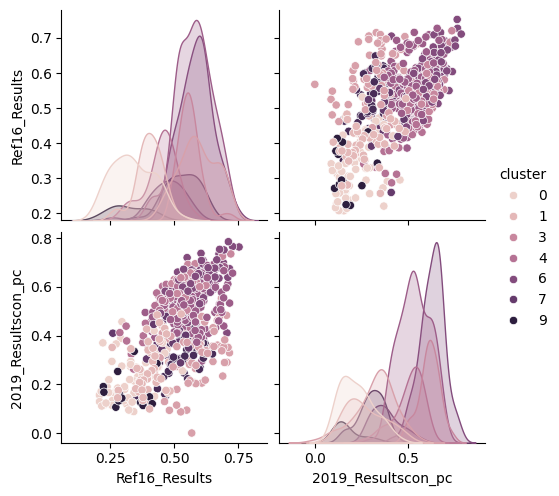

In [34]:
# Visualise the clusters using pairplot_cluster()
def pairplot_cluster(df, cols, cluster_assignment):
    """
    Input
        df, dataframe that contains the data to plot
        cols, columns to consider for the plot
        cluster_assignments, cluster asignment returned 
        by the clustering algorithm
    """
    pd.set_option('mode.chained_assignment', None) #don't want a setcopywarning
    # seaborn will color the samples according to the column cluster
    df['cluster'] = cluster_assignment 
    sns.pairplot(df, vars=cols, hue='cluster')
    df.drop('cluster', axis=1, inplace=True)

pairplot_cluster(X_df, ['Ref16_Results', '2019_Resultscon_pc'], cluster_assignment_ward)
plt.show()